# Univ.AI - Hackathon 1.1

* The problem at hand is of "Supervised Binary Classification Problem"
* Author: Rachit Jain

## Importing Necessary Libraries & Packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, plot_confusion_matrix

import regex as re

## Load Data

In [39]:
data_train = pd.read_csv('Data/Training Data.csv')
data_test = pd.read_csv('Data/Test Data.csv')

In [40]:
data_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [41]:
data_train.iloc[13363,:]

Id                              13364
income                         110437
age                                41
experience                          8
married                        single
house_ownership                rented
car_ownership                      no
profession             Police_officer
city                         Gopalpur
state                     West_Bengal
current_job_years                   8
current_house_years                12
risk_flag                           1
Name: 13363, dtype: object

## Exploratory Data Analysis

In [42]:
# Numerical Data Description
data_train.describe().round(2)

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.0,252000.00
mean,126000.50,4997116.67,49.95,10.08,6.33,12.0,0.12
std,72746.28,2878311.01,17.06,6.00,3.65,1.4,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.0,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.0,0.00
50%,126000.50,5000694.50,50.00,10.00,6.00,12.0,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.0,0.00
max,252000.00,9999938.00,79.00,20.00,14.00,14.0,1.00


In [43]:
# Categorical Data Description
data_train.describe(include=[np.object])

,married,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


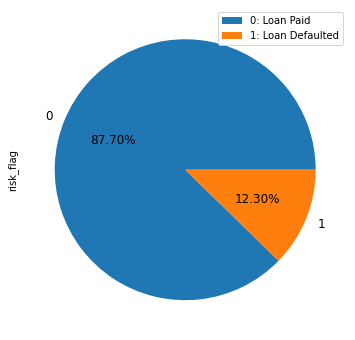

In [44]:
data_train.risk_flag.value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Loan Paid", "1: Loan Defaulted"])
plt.show()

* This points out to the fact that are data is unbalanced in terms of the two classification sets

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


* There are no null values in the entire dataset for any of the features.
* Most object features can be converted to categorical, numerical datatypes using LabelEncoding

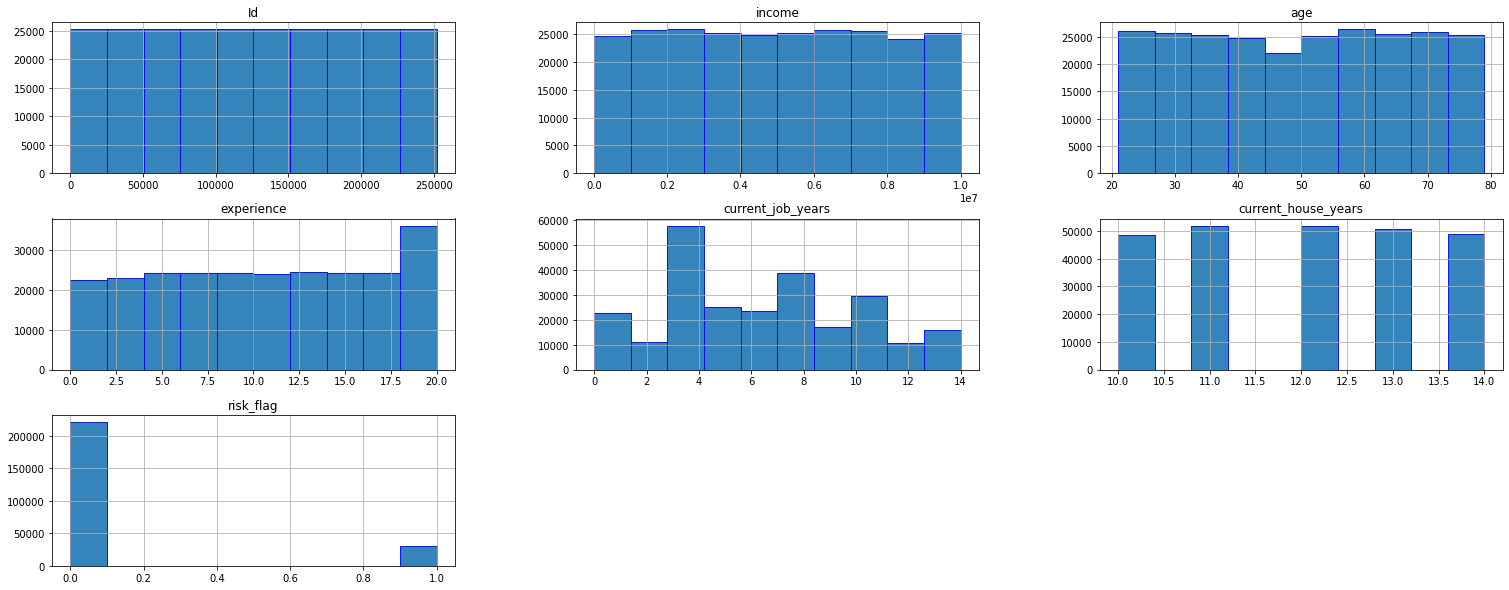

In [46]:
data_train.hist(figsize=(26,10), bins=10, ec='b', alpha=0.9, grid=True)
plt.show()

* We should also see this kind of a distribution for the categorical variables

In [47]:
data_train

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


<AxesSubplot:xlabel='married', ylabel='income'>

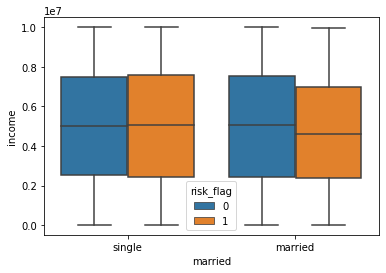

In [48]:
sns.boxplot(x='married', y='income', data=data_train, hue='risk_flag')

In [49]:
# sns.pairplot(data=data_train.loc[:,['income', 'age','risk_flag']], kind='reg', hue='risk_flag')

<AxesSubplot:>

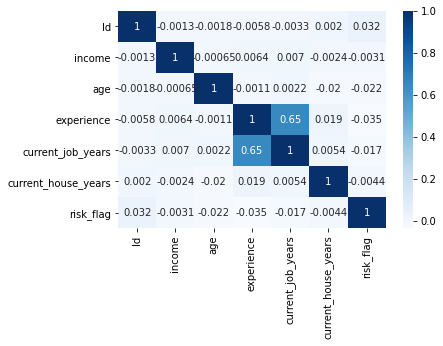

In [50]:
data_corr = data_train.corr()
sns.heatmap(data_corr, annot=True, cmap='Blues')

<AxesSubplot:xlabel='income', ylabel='Count'>

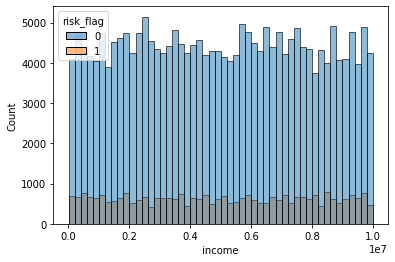

In [51]:
sns.histplot(data=data_train, x='income', hue='risk_flag', bins=50)

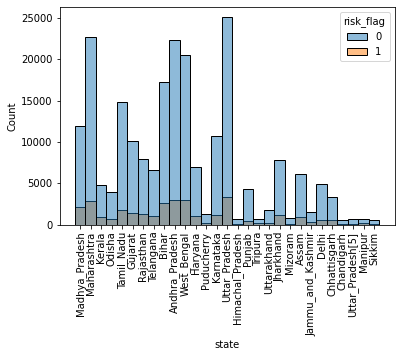

In [52]:
sns.histplot(data=data_train, x='state', hue='risk_flag')
plt.xticks(rotation=90)
plt.show()

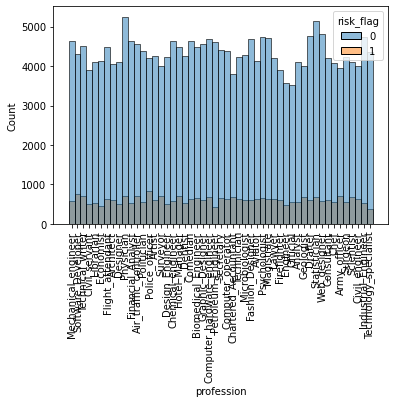

In [53]:
sns.histplot(data=data_train, x='profession', hue='risk_flag')
plt.xticks(rotation=90)
plt.show()

## Data Cleaning

In [54]:
data_train

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [55]:
data_train['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [56]:
data_train['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

In [57]:
len(data_train['profession'].unique())

51

In [58]:
a = data_train['city'].unique()
a.sort()
a

array(['Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl',
       'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar',
       'Amaravati', 'Ambala', 'Ambarnath', 'Ambattur', 'Amravati',
       'Amritsar', 'Amroha', 'Anand', 'Anantapur', 'Anantapuram[24]',
       'Arrah', 'Asansol', 'Aurangabad', 'Aurangabad[39]', 'Avadi',
       'Bahraich', 'Ballia', 'Bally', 'Bangalore', 'Baranagar', 'Barasat',
       'Bardhaman', 'Bareilly', 'Bathinda', 'Begusarai', 'Belgaum',
       'Bellary', 'Berhampore', 'Berhampur', 'Bettiah[33]', 'Bhagalpur',
       'Bhalswa_Jahangir_Pur', 'Bharatpur', 'Bhatpara', 'Bhavnagar',
       'Bhilai', 'Bhilwara', 'Bhimavaram', 'Bhind', 'Bhiwandi', 'Bhiwani',
       'Bhopal', 'Bhubaneswar', 'Bhusawal', 'Bidar', 'Bidhannagar',
       'Bihar_Sharif', 'Bijapur', 'Bikaner', 'Bilaspur', 'Bokaro',
       'Bongaigaon', 'Bulandshahr', 'Burhanpur', 'Buxar[37]',
       'Chandigarh_city', 'Chandrapur', 'Chapra', 'Chennai', 'Chinsurah',
       'Chittoor[28]

In [59]:
a = data_train['state'].unique()
a.sort()
a

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
       'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttar_Pradesh[5]',
       'Uttarakhand', 'West_Bengal'], dtype=object)

In [60]:
def categorical_encoder(df, col_list):
    le = LabelEncoder()
    for col in col_list:
        df[col] = le.fit_transform(df[col])

In [61]:
### Removing everything between the square brackets to get the correctly labelled states and cities.
def clean_brackets(df, col_list):
    for col in col_list:
        df[col] = df[col].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

In [62]:
def drop_cols(df, col_list):
    for col in col_list:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

In [63]:
cat_cols = ['married', 'house_ownership', 'car_ownership']
categorical_encoder(data_train, cat_cols)
categorical_encoder(data_test, cat_cols)

In [64]:
col_list = ['city', 'state']
clean_brackets(data_train, col_list)
clean_brackets(data_test, col_list)

In [65]:
### Joining city and state to create a common address field
data_train['address'] = data_train['city'] + ', ' + data_train['state']
data_test['address'] = data_test['city'] + ', ' + data_test['state']

In [66]:
### One-hot Encoding Text features
def one_hot_encoder(df, col_list):
    for col in col_list:
        one_hot = pd.get_dummies(df[col])
        df = df.join(one_hot)
    return df

In [67]:
def convert_income(df, bins, labels, col_list):
    for col in col_list:
        df[col] = pd.cut(df[col], bins=bins, labels=labels)
    return df

In [68]:
col_list = ['profession', 'address']
data_train = one_hot_encoder(data_train, col_list)
data_test = one_hot_encoder(data_test, col_list)

In [69]:
print(data_train.shape)
print(data_test.shape)

(252000, 382)
(28000, 381)


In [70]:
# Creating bins
bins = np.linspace(0, 10**7, 100)
labels = np.arange(1, 100, 1)
col_list = ['income']
data_train = convert_income(data_train, bins, labels, col_list)
data_test = convert_income(data_test, bins, labels, col_list)

In [71]:
data_train = data_train.select_dtypes(exclude=['object'])
data_test = data_test.select_dtypes(exclude=['object'])
data_test

,id,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,Air traffic controller,...,"Unnao, Uttar Pradesh","Vadodara, Gujarat","Varanasi, Uttar Pradesh","Vasai-Virar, Maharashtra","Vellore, Tamil Nadu","Vijayanagaram, Andhra Pradesh","Vijayawada, Andhra Pradesh","Visakhapatnam, Andhra Pradesh","Warangal, Telangana","Yamunanagar, Haryana"
0,1,74,59,19,1,2,0,4,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2,13,25,5,1,2,0,5,10,0,...,0,0,0,0,0,0,0,0,0,0
2,3,89,50,12,1,2,0,9,14,0,...,0,0,0,0,0,0,0,0,0,0
3,4,20,49,9,0,2,1,3,12,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,25,18,1,2,1,13,11,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,99,57,13,1,2,0,5,10,0,...,0,0,0,0,0,0,0,0,0,0
27996,27997,29,47,9,1,2,0,9,14,0,...,0,0,0,0,0,0,0,0,0,0
27997,27998,81,24,5,1,2,0,4,13,0,...,0,0,0,0,0,0,0,0,0,0
27998,27999,94,51,13,1,2,1,13,14,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
col_list = ['Id', 'id']
drop_cols(data_train, col_list)
drop_cols(data_test, col_list)

## Machine Learning Algorithms

In [73]:
### Getting Training and Test Set
features = data_train.copy()
targets = features.pop('risk_flag')
data_train.select_dtypes(exclude=['object'])

# from sklearn.feature_selection import SelectKBest, chi2
# features = SelectKBest(chi2, k=100).fit_transform(features, targets)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=10)
print(X_train.shape)

(189000, 376)


In [74]:
### Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train = np.array(y_train).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

In [75]:
X_train

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,Air_traffic_controller,Analyst,...,"Unnao, Uttar_Pradesh","Vadodara, Gujarat","Varanasi, Uttar_Pradesh","Vasai-Virar, Maharashtra","Vellore, Tamil_Nadu","Vijayanagaram, Andhra_Pradesh","Vijayawada, Andhra_Pradesh","Visakhapatnam, Andhra_Pradesh","Warangal, Telangana","Yamunanagar, Haryana"
95304,11,61,6,1,2,1,4,14,0,0,...,0,0,0,0,0,0,0,0,0,0
157809,86,69,0,1,2,0,0,13,0,0,...,0,0,0,0,0,1,0,0,0,0
166067,41,67,10,1,2,0,10,13,0,0,...,0,0,0,0,0,0,0,0,0,0
188004,62,70,8,0,2,1,8,10,0,0,...,0,0,0,0,0,0,0,0,0,0
187326,13,68,10,1,2,0,10,14,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144451,62,45,19,1,0,0,11,12,0,0,...,0,0,0,0,0,0,0,0,0,0
249040,27,39,20,1,2,0,7,10,0,0,...,0,0,0,0,0,0,0,0,0,0
213057,44,29,14,1,2,0,13,14,0,0,...,0,0,0,0,0,0,0,0,0,0
148836,99,25,17,1,2,1,10,12,1,0,...,0,0,0,0,0,0,0,0,0,0


### General Functions

In [76]:
## Calculate ROC Score
def calc_score(model, y_pred, y_test):
    auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
    print("The ROC AUC Score using {} is: ".format(model), auc_score)
    return auc_score

In [77]:
def ensemble_method(X_train, y_train, X_test, y_test, kind='soft'):
    model1 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')
    model2 = KNeighborsClassifier()
    model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print("The score of the Emsembled version of Random Forest and KNN is: ", score)
    return model

In [78]:
## Model Training
def model_training(models, X_train, y_train, X_test, y_test):
    for model in models:
        if model == 'naive_bayes':
            y_pred = naive_bayes(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
        elif model == 'random_forest':
            y_pred = random_forest(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
        elif model == 'light_gbm':
            y_pred = light_gbm(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
        elif model == 'knn':
            y_pred = random_forest(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
        elif model == 'log_reg':
            y_pred = log_reg(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
        elif model == 'svm':
            y_pred = svm(X_train, y_train, X_test)
            score = calc_score(model, y_pred, y_test)
    return y_pred

In [79]:
## Naive Bayes
def naive_bayes(X_train, y_train, X_test):
    from sklearn.naive_bayes import GaussianNB
    naive = GaussianNB()
    naive.fit(X_train, y_train)
    y_pred = naive.predict_proba(X_test)[:,1]
    return y_pred

In [80]:
## Random Forest
def random_forest(X_train, y_train, X_test):
    from sklearn.ensemble import RandomForestClassifier
    random = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')
    random.fit(X_train, y_train)
    y_pred = random.predict_proba(X_test)[:,1]
    return y_pred

In [81]:
## Light GBM
def light_gbm(X_train, y_train, X_test):
    from lightgbm import LGBMClassifier 
    lgbm = LGBMClassifier()
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict_proba(X_test)[:,1]
    return y_pred

In [82]:
def knn(X_train, y_train, X_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict_proba(X_test)[:,1]
    return y_pred

In [83]:
def log_reg(X_train, y_train, X_test):
    from sklearn.linear_model import LogisticRegression
    lrm = LogisticRegression() 
    lrm.fit(X_train, y_train)
    y_pred = lrm.predict_proba(X_test)[:,1]
    return y_pred

In [84]:
def svm(X_train, y_train, X_test):
    from sklearn import svm
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    return y_pred

In [85]:
models = ['random_forest']
# models = ['knn']
y_pred = model_training(models, X_train, y_train, X_test, y_test)

The ROC AUC Score using random_forest is:  0.936394266913613


In [86]:
# models = ['random_forest']
models = ['knn']
y_pred = model_training(models, X_train, y_train, X_test, y_test)

The ROC AUC Score using knn is:  0.9364951708237845


In [51]:
# ensembled_model = ensemble_method(X_train, y_train, X_test, y_test, 'hard')

In [127]:
# ensembled_model = ensemble_method(X_train, y_train, X_test, y_test, 'soft')

In [128]:
# ensembled_model.predict(X_test)

[0.00000000e+00 5.16195638e-04 1.29048910e-03 ... 9.96902826e-01
 9.96902826e-01 1.00000000e+00]
[0.00000000e+00 5.42976598e-05 1.44793759e-04 ... 2.13426001e-01
 2.13480299e-01 1.00000000e+00]
[1.97414571 0.97414571 0.95097438 ... 0.00897436 0.0031746  0.        ]
0.9364951708237845
Threshold value is: 0.008974358974358974


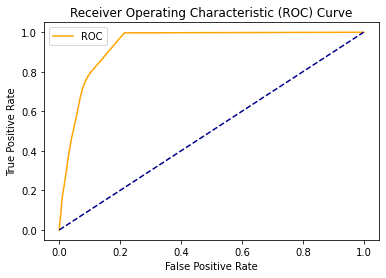

In [87]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [159]:
# thresholds = np.linspace(0.0, 1.0, 50)
# min = 1
# best_thres = 0
# for thres in thresholds:
#     y_res = np.where(y_pred > thres, 1, 0)
#     count = np.sum(np.abs(y_res - y_test))/len(y_test)
#     print("Number of differing variables are: ", count)
#     if count < min:
#         min = count
#         best_thres = thres
# print("The best threshold comes out to be {} with a differing score of {}.".format(best_thres, min))

In [112]:
best_thres = 0.003
# best_thres = optimal_threshold

In [113]:
best_thres

0.003

In [114]:
y_pred_copy = y_pred.copy()
y_pred_copy = np.where(y_pred_copy > best_thres, 1, 0)

In [115]:
y_pred_copy

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 1],
       [1, 1]])

## Generating Predictions

In [116]:
data_test

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,Air traffic controller,Analyst,...,"Unnao, Uttar Pradesh","Vadodara, Gujarat","Varanasi, Uttar Pradesh","Vasai-Virar, Maharashtra","Vellore, Tamil Nadu","Vijayanagaram, Andhra Pradesh","Vijayawada, Andhra Pradesh","Visakhapatnam, Andhra Pradesh","Warangal, Telangana","Yamunanagar, Haryana"
0,74,59,19,1,2,0,4,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,25,5,1,2,0,5,10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,89,50,12,1,2,0,9,14,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,49,9,0,2,1,3,12,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,25,18,1,2,1,13,11,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,99,57,13,1,2,0,5,10,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,29,47,9,1,2,0,9,14,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,81,24,5,1,2,0,4,13,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,94,51,13,1,2,1,13,14,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# knn = KNeighborsClassifier()
# knn.fit(features, targets)
# y_pred_test = knn.predict_proba(data_test)[:,1]

In [118]:
# Random Forest Classification
random = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')
random.fit(features, targets)
y_pred_test = random.predict_proba(data_test)[:,1]

In [119]:
y_pred_test = np.where(y_pred_test > best_thres, 1, 0)

In [120]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

In [121]:
y_pred = pd.DataFrame(y_pred_test, columns=['risk_flag'])
y_pred['id'] = np.arange(1,y_pred.shape[0]+1,1)
y_pred = y_pred[['id','risk_flag']]
y_pred

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,1


In [122]:
y_pred['risk_flag'].value_counts()

0    19285
1     8715
Name: risk_flag, dtype: int64

## Submission Ready

In [123]:
y_pred.to_csv('Data/prediction_14_best.csv', index=False)